# Introduction to Synthetic Aperture Radar Using Python and MATLAB 

## by Andy Harrison - © 2022 Artech House

---

## Example 3.4.8 Backprojection Algorithm - Toyota Avalon

---

**Import Modules**

In [1]:
%matplotlib inline

import numpy as np

from scipy.constants import speed_of_light

from scipy.io import loadmat

import backprojection as bp

from matplotlib import pyplot as plt

**Set the image span (meters)**

In [2]:
x_span = 10

y_span = 10

**Number of bins in x and y**

In [3]:
nx = 1000

ny = 1000

**Set the azimuth span (degrees)**

In [4]:
az_start = 0

az_end = 90

**Set the window type for the image**

In [5]:
window_type = 'None'

**Set the dynamic range of the image (dB)**

In [6]:
dynamic_range = 40

**Load the selected target**

In [7]:
signature = loadmat('Toyota_Avalon_el30.mat')

signal = np.squeeze(signature['vv'])

az = np.squeeze(signature['azim'])

el = np.squeeze(signature['elev'])

frequency = np.squeeze(signature['FGHz']) * 1e9

**Set up the image space**

In [8]:
xi = np.linspace(-0.5 * x_span, 0.5 * x_span, int(nx))

yi = np.linspace(-0.5 * y_span, 0.5 * y_span, int(ny))

[x_image, y_image] = np.meshgrid(xi, yi)

z_image = np.zeros_like(x_image)

**Choose the pulses in the azimuth range**

In [9]:
sensor_az = []

index = []

i = 0

# Loop over all azimuth angles
for a in az:
    
    if az_start <= a and a <= az_end:
        
        sensor_az.append(np.radians(a))
        
        index.append(i)
        
        i += 1

signal1 = signal[:,index]       

**Get the sensor elevation angles**

In [10]:
sensor_el = np.radians(el) * np.ones_like(sensor_az)

**Size of the data**

In [11]:
nf = len(frequency)

na = len(sensor_az)

**Set the length of the FFT**

In [12]:
fft_length = 4 * 2**(np.ceil(np.log2(nf)))

**Get the window coefficients**

In [13]:
if window_type == 'Hanning':
    
    coefficients = np.outer(np.hanning(nf), np.hanning(na))
    
elif window_type == 'Hamming':
    
    coefficients = np.outer(np.hamming(nf), np.hamming(na))
    
else:
    
    coefficients = np.ones_like(signal1)

**Apply the selected window**

In [14]:
signal1 = signal1 * coefficients

**Reconstruct the image with backprojection**

In [15]:
bp_image = bp.reconstruct2(signal1, sensor_az, sensor_el, x_image, y_image, z_image, frequency, int(fft_length))

**Plot the backprojected image**

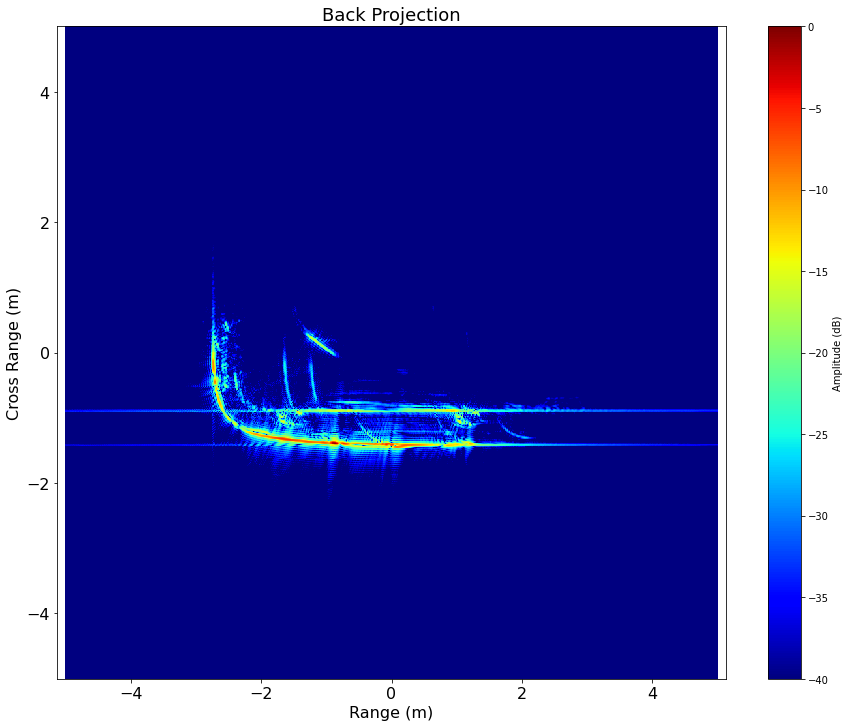

In [16]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 12)



# Plot the backprojected image

plt.figure

plt.pcolor(xi, yi, 20 * np.log10(np.abs(bp_image) / np.max(np.abs(bp_image))), cmap='jet', vmin=-abs(dynamic_range), vmax=0)



# Set the title and labels

plt.title('Back Projection', size=18)

plt.xlabel('Range (m)', size=16)

plt.ylabel('Cross Range (m)', size=16)



# Make the axes equal

plt.axis('equal')



# Set the tick label size

plt.tick_params(labelsize=16)



# Turn on the colorbar and set the label

cbar = plt.colorbar()

cbar.set_label('Amplitude (dB)')



# Show the figure

plt.show()